In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Cargar el archivo CSV
df = pd.read_csv('C:/Users/ASUS/Desktop/Traffic Accidents/data/traffic_accidents.csv')
df.head(5)

,crash_date,traffic_control_device,weather_condition,lighting_condition,first_crash_type,trafficway_type,alignment,roadway_surface_cond,road_defect,crash_type,...,most_severe_injury,injuries_total,injuries_fatal,injuries_incapacitating,injuries_non_incapacitating,injuries_reported_not_evident,injuries_no_indication,crash_hour,crash_day_of_week,crash_month
0,07/29/2023 01:00:00 PM,TRAFFIC SIGNAL,CLEAR,DAYLIGHT,TURNING,NOT DIVIDED,STRAIGHT AND LEVEL,UNKNOWN,UNKNOWN,NO INJURY / DRIVE AWAY,...,NO INDICATION OF INJURY,0.0,0.0,0.0,0.0,0.0,3.0,13,7,7
1,08/13/2023 12:11:00 AM,TRAFFIC SIGNAL,CLEAR,"DARKNESS, LIGHTED ROAD",TURNING,FOUR WAY,STRAIGHT AND LEVEL,DRY,NO DEFECTS,NO INJURY / DRIVE AWAY,...,NO INDICATION OF INJURY,0.0,0.0,0.0,0.0,0.0,2.0,0,1,8
2,12/09/2021 10:30:00 AM,TRAFFIC SIGNAL,CLEAR,DAYLIGHT,REAR END,T-INTERSECTION,STRAIGHT AND LEVEL,DRY,NO DEFECTS,NO INJURY / DRIVE AWAY,...,NO INDICATION OF INJURY,0.0,0.0,0.0,0.0,0.0,3.0,10,5,12
3,08/09/2023 07:55:00 PM,TRAFFIC SIGNAL,CLEAR,DAYLIGHT,ANGLE,FOUR WAY,STRAIGHT AND LEVEL,DRY,NO DEFECTS,INJURY AND / OR TOW DUE TO CRASH,...,NONINCAPACITATING INJURY,5.0,0.0,0.0,5.0,0.0,0.0,19,4,8
4,08/19/2023 02:55:00 PM,TRAFFIC SIGNAL,CLEAR,DAYLIGHT,REAR END,T-INTERSECTION,STRAIGHT AND LEVEL,UNKNOWN,UNKNOWN,NO INJURY / DRIVE AWAY,...,NO INDICATION OF INJURY,0.0,0.0,0.0,0.0,0.0,3.0,14,7,8


In [ ]:
# 1. Información básica del dataset
print("Información básica del dataset:")
print(df.info())

Información básica del dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 209306 entries, 0 to 209305
Data columns (total 24 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   crash_date                     209306 non-null  object 
 1   traffic_control_device         209306 non-null  object 
 2   weather_condition              209306 non-null  object 
 3   lighting_condition             209306 non-null  object 
 4   first_crash_type               209306 non-null  object 
 5   trafficway_type                209306 non-null  object 
 6   alignment                      209306 non-null  object 
 7   roadway_surface_cond           209306 non-null  object 
 8   road_defect                    209306 non-null  object 
 9   crash_type                     209306 non-null  object 
 10  intersection_related_i         209306 non-null  object 
 11  damage                         209306 non-null  object 
 12

In [11]:
df['crash_date'] = pd.to_datetime(df['crash_date'])


C:\Users\ASUS\AppData\Local\Temp\ipykernel_2420\3839517630.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['crash_date'] = pd.to_datetime(df['crash_date'])


 most_severe_injury no es numérica
Si queremos hacer análisis de severidad, podemos convertir esta columna en una variable categórica ordenada.

In [12]:
df['most_severe_injury'] = pd.Categorical(df['most_severe_injury'],
                                          categories=['NO INDICATION OF INJURY', 'REPORTED, NOT EVIDENT',
                                                      'NON-INCAPACITATING INJURY', 'INCAPACITATING INJURY', 'FATAL'],
                                          ordered=True)


In [13]:
df['intersection_related_i'] = df['intersection_related_i'].apply(lambda x: 1 if x == 'Y' else 0)


In [14]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 209306 entries, 0 to 209305
Data columns (total 24 columns):
 #   Column                         Non-Null Count   Dtype         
---  ------                         --------------   -----         
 0   crash_date                     209306 non-null  datetime64[ns]
 1   traffic_control_device         209306 non-null  object        
 2   weather_condition              209306 non-null  object        
 3   lighting_condition             209306 non-null  object        
 4   first_crash_type               209306 non-null  object        
 5   trafficway_type                209306 non-null  object        
 6   alignment                      209306 non-null  object        
 7   roadway_surface_cond           209306 non-null  object        
 8   road_defect                    209306 non-null  object        
 9   crash_type                     209306 non-null  object        
 10  intersection_related_i         209306 non-null  int64         
 11  

In [15]:
# 2. Estadísticas descriptivas
print("\nEstadísticas descriptivas:")
print(df.describe(include='all').to_string())


Estadísticas descriptivas:
                           crash_date traffic_control_device weather_condition lighting_condition first_crash_type trafficway_type           alignment roadway_surface_cond road_defect              crash_type  intersection_related_i       damage prim_contributory_cause      num_units       most_severe_injury  injuries_total  injuries_fatal  injuries_incapacitating  injuries_non_incapacitating  injuries_reported_not_evident  injuries_no_indication     crash_hour  crash_day_of_week    crash_month
count                          209306                 209306            209306             209306           209306          209306              209306               209306      209306                  209306           209306.000000       209306                  209306  209306.000000                   177779   209306.000000   209306.000000            209306.000000                209306.000000                  209306.000000           209306.000000  209306.000000      209

In [16]:
# 3. Valores faltantes
print("\nValores faltantes por columna:")
print(df.isnull().sum().to_string())


Valores faltantes por columna:
crash_date                           0
traffic_control_device               0
weather_condition                    0
lighting_condition                   0
first_crash_type                     0
trafficway_type                      0
alignment                            0
roadway_surface_cond                 0
road_defect                          0
crash_type                           0
intersection_related_i               0
damage                               0
prim_contributory_cause              0
num_units                            0
most_severe_injury               31527
injuries_total                       0
injuries_fatal                       0
injuries_incapacitating              0
injuries_non_incapacitating          0
injuries_reported_not_evident        0
injuries_no_indication               0
crash_hour                           0
crash_day_of_week                    0
crash_month                          0


In [17]:
print(df["most_severe_injury"].unique())


['NO INDICATION OF INJURY', NaN, 'INCAPACITATING INJURY', 'REPORTED, NOT EVIDENT', 'FATAL']
Categories (5, object): ['NO INDICATION OF INJURY' < 'REPORTED, NOT EVIDENT' < 'NON-INCAPACITATING INJURY' < 'INCAPACITATING INJURY' < 'FATAL']


In [18]:
print(df["most_severe_injury"].value_counts(dropna=False))


most_severe_injury
NO INDICATION OF INJURY      154789
NaN                           31527
REPORTED, NOT EVIDENT         16075
INCAPACITATING INJURY          6564
FATAL                           351
NON-INCAPACITATING INJURY         0
Name: count, dtype: int64


In [19]:
print(df[df["most_severe_injury"] == "NON-INCAPACITATING INJURY"])


Empty DataFrame
Columns: [crash_date, traffic_control_device, weather_condition, lighting_condition, first_crash_type, trafficway_type, alignment, roadway_surface_cond, road_defect, crash_type, intersection_related_i, damage, prim_contributory_cause, num_units, most_severe_injury, injuries_total, injuries_fatal, injuries_incapacitating, injuries_non_incapacitating, injuries_reported_not_evident, injuries_no_indication, crash_hour, crash_day_of_week, crash_month]
Index: []

[0 rows x 24 columns]


In [20]:
df["most_severe_injury"] = df["most_severe_injury"].str.strip()
print(df["most_severe_injury"].unique())

['NO INDICATION OF INJURY' nan 'INCAPACITATING INJURY'
 'REPORTED, NOT EVIDENT' 'FATAL']


In [21]:
print(df["most_severe_injury"].dtype)

object


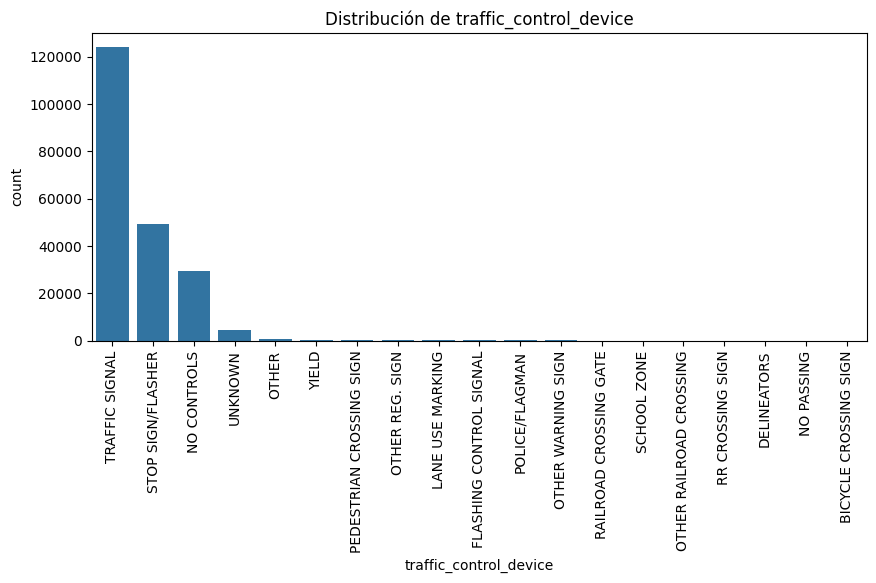

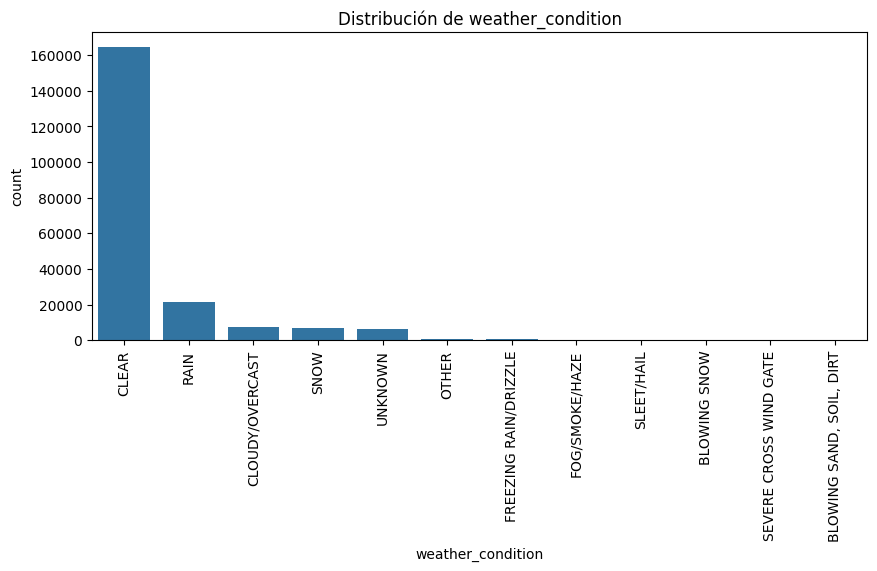

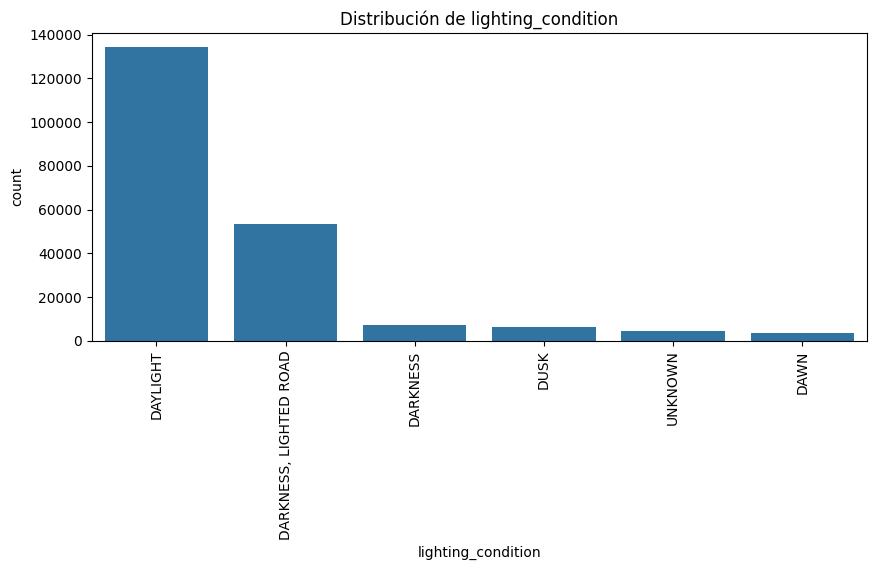

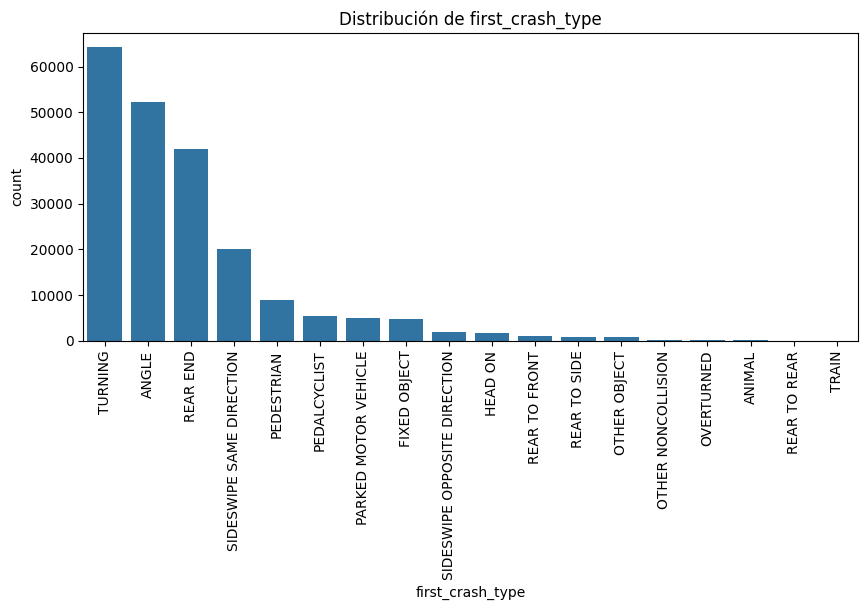

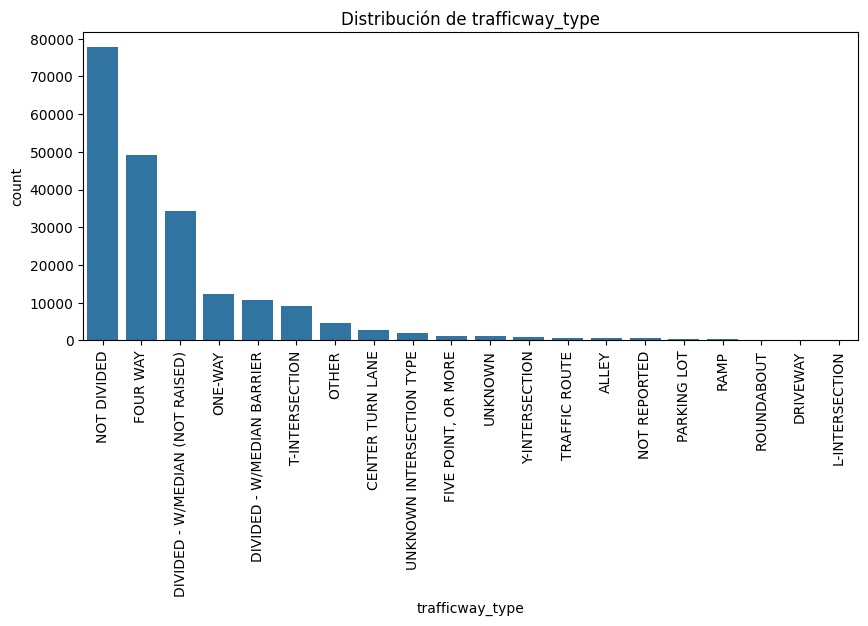

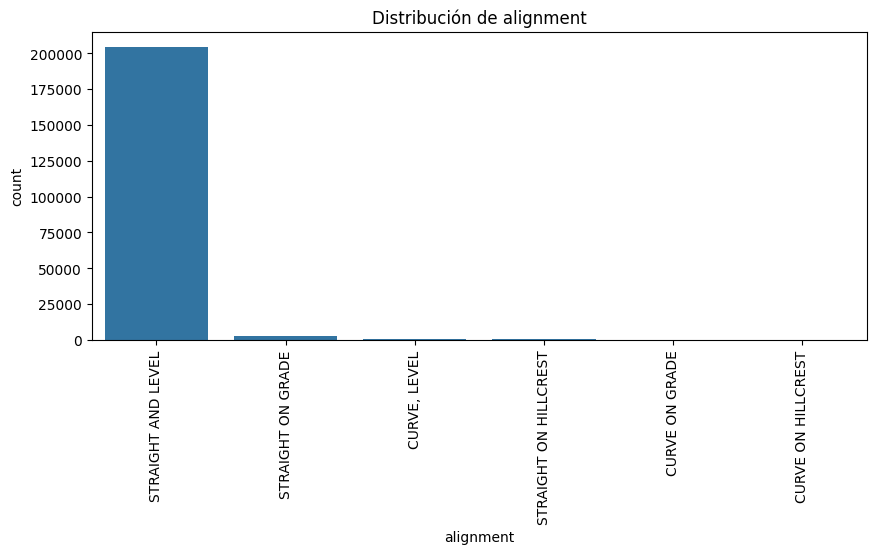

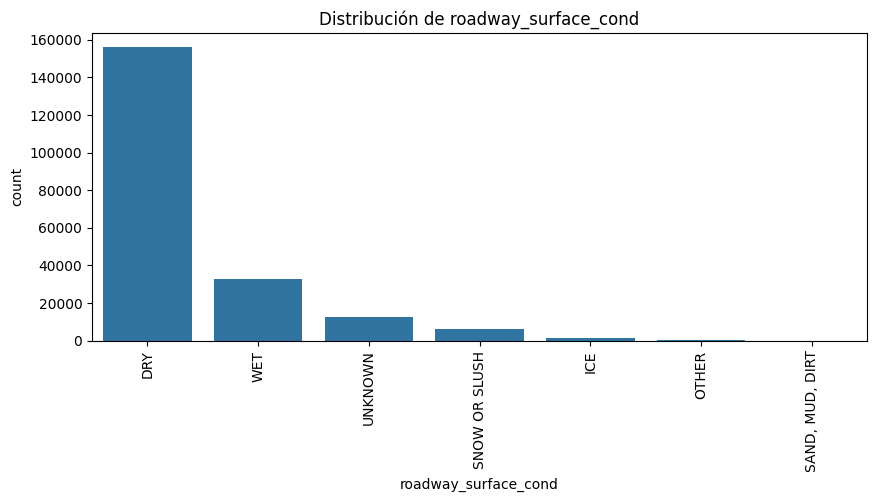

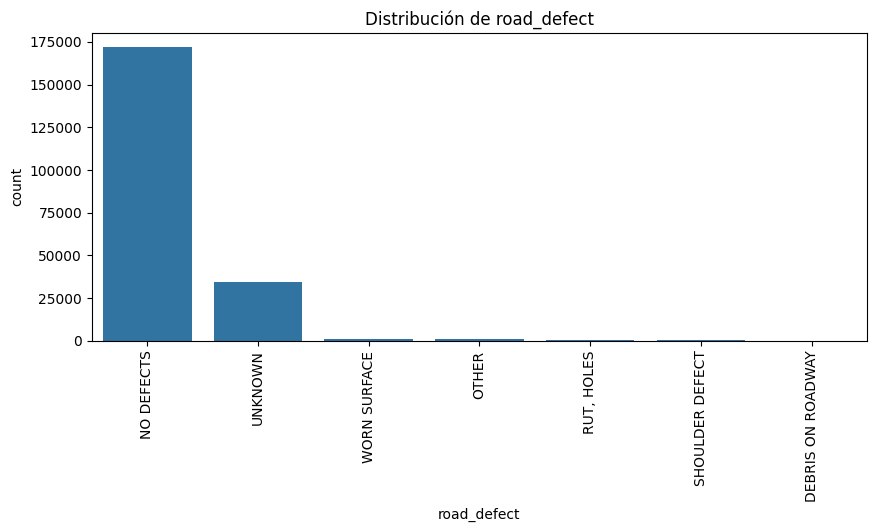

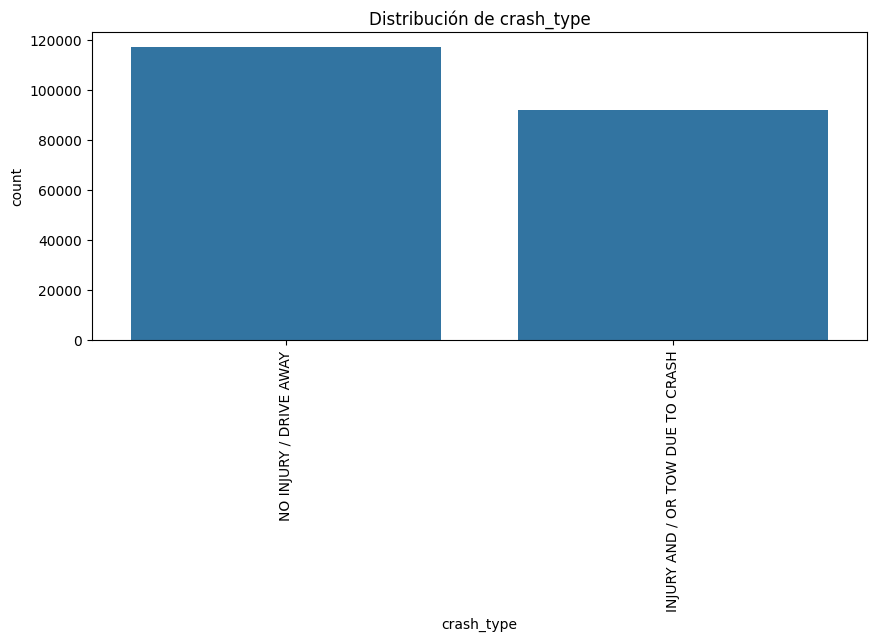

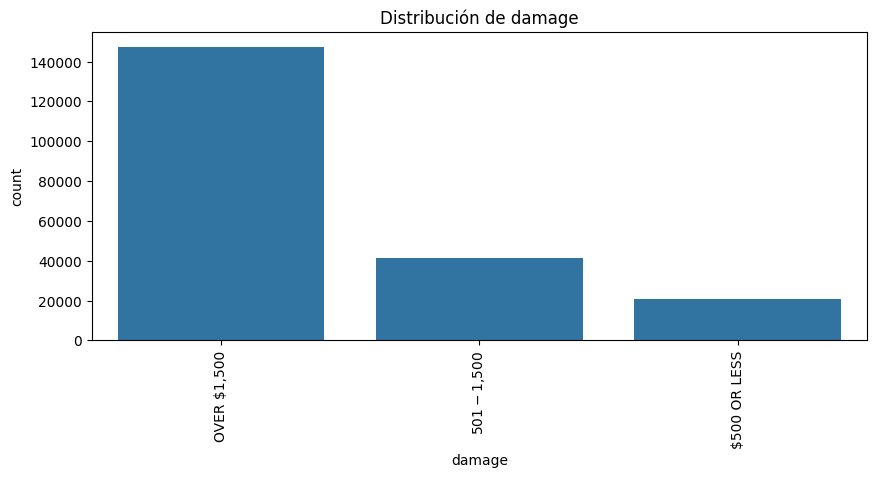

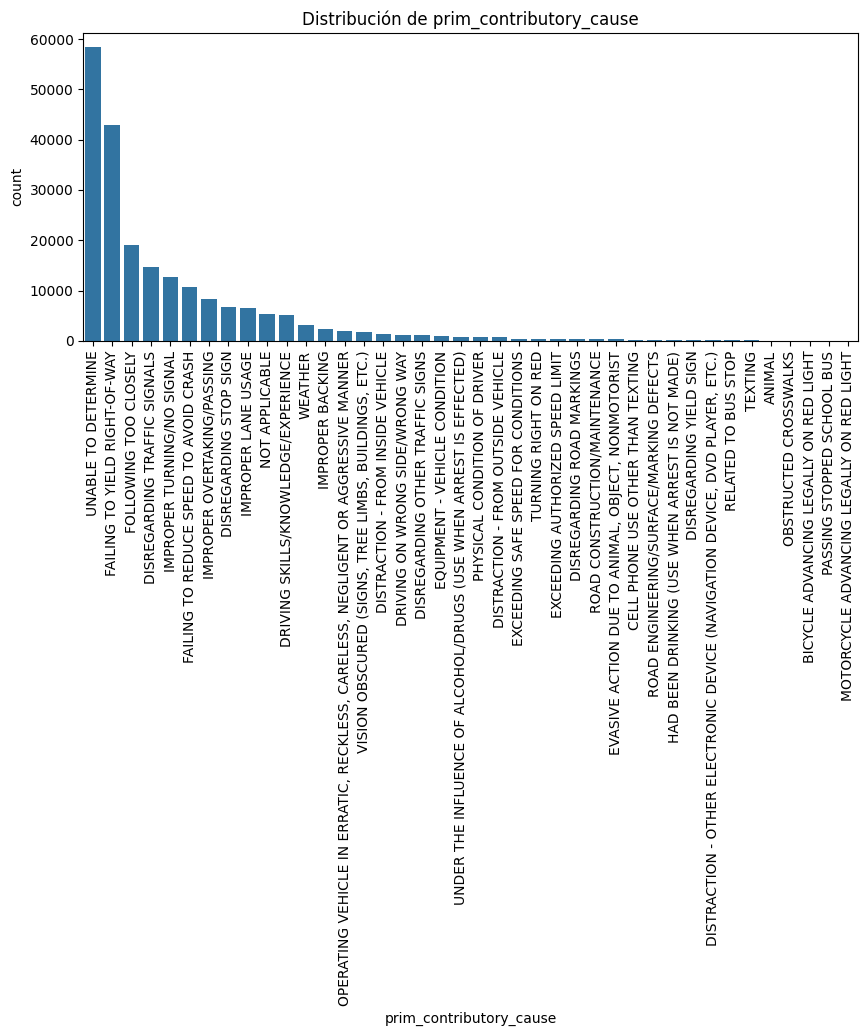

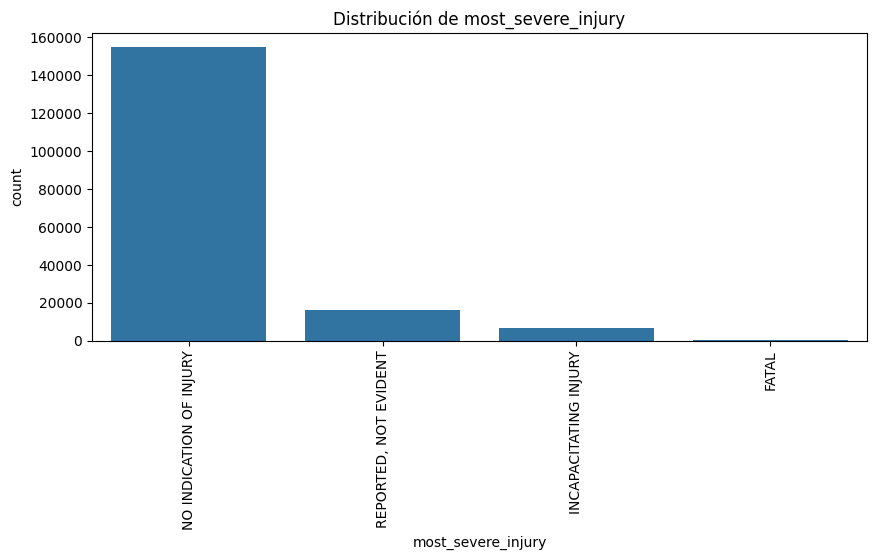

In [22]:
# 4. Distribución de variables categóricas
categorical_columns = df.select_dtypes(include=['object']).columns
for col in categorical_columns:
    plt.figure(figsize=(10, 4))
    sns.countplot(data=df, x=col, order=df[col].value_counts().index)
    plt.xticks(rotation=90)
    plt.title(f'Distribución de {col}')
    plt.show()

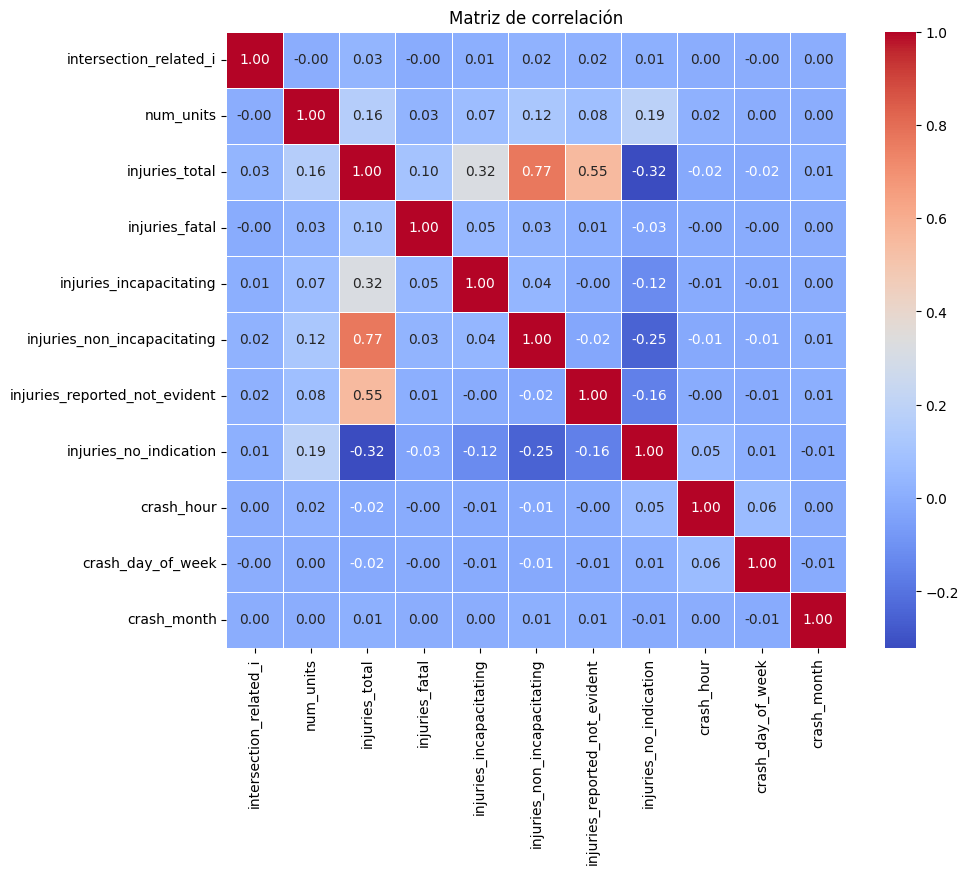

In [23]:
# 6. Correlación entre variables numéricas

# Seleccionar solo las columnas numéricas
numeric_columns = df.select_dtypes(include=['number']).columns

# Calcular la matriz de correlación
corr_matrix = df[numeric_columns].corr()

# Graficar la matriz de correlación
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Matriz de correlación')
plt.show()


Análisis de la variable objetivo 'most_severe_injury':
most_severe_injury
NO INDICATION OF INJURY    154789
REPORTED, NOT EVIDENT       16075
INCAPACITATING INJURY        6564
FATAL                         351
Name: count, dtype: int64


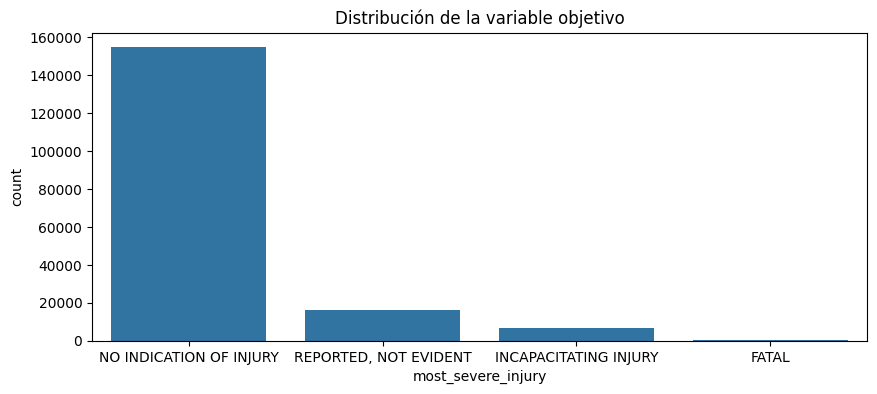

In [24]:
# 7. Análisis de la variable objetivo (si existe)
# Supongamos que 'most_severe_injury' es la variable objetivo
if 'most_severe_injury' in df.columns:
    print("\nAnálisis de la variable objetivo 'most_severe_injury':")
    print(df['most_severe_injury'].value_counts())
    plt.figure(figsize=(10, 4))
    sns.countplot(data=df, x='most_severe_injury', order=df['most_severe_injury'].value_counts().index)
    plt.title('Distribución de la variable objetivo')
    plt.show()


Distribución de la hora del accidente:


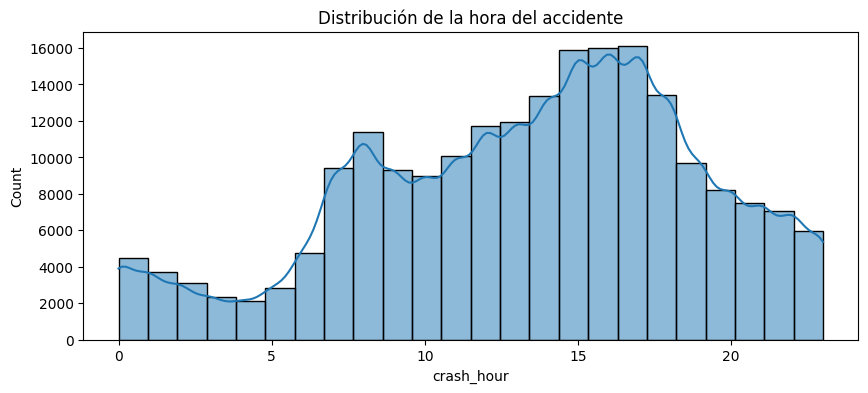

In [25]:
# 8. Análisis de la hora del accidente
if 'crash_hour' in df.columns:
    print("\nDistribución de la hora del accidente:")
    plt.figure(figsize=(10, 4))
    sns.histplot(df['crash_hour'], bins=24, kde=True)
    plt.title('Distribución de la hora del accidente')
    plt.show()


Distribución del mes del accidente:


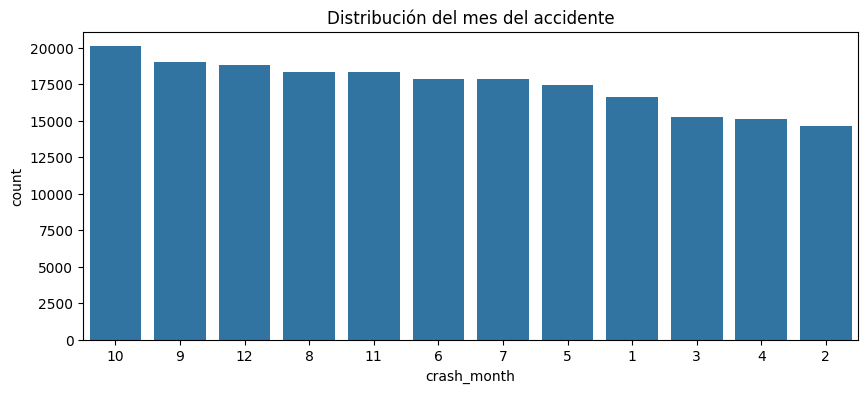

In [26]:
# 10. Análisis del mes del accidente
if 'crash_month' in df.columns:
    print("\nDistribución del mes del accidente:")
    plt.figure(figsize=(10, 4))
    sns.countplot(data=df, x='crash_month', order=df['crash_month'].value_counts().index)
    plt.title('Distribución del mes del accidente')
    plt.show()


Relación entre 'weather_condition' y 'injuries_total':


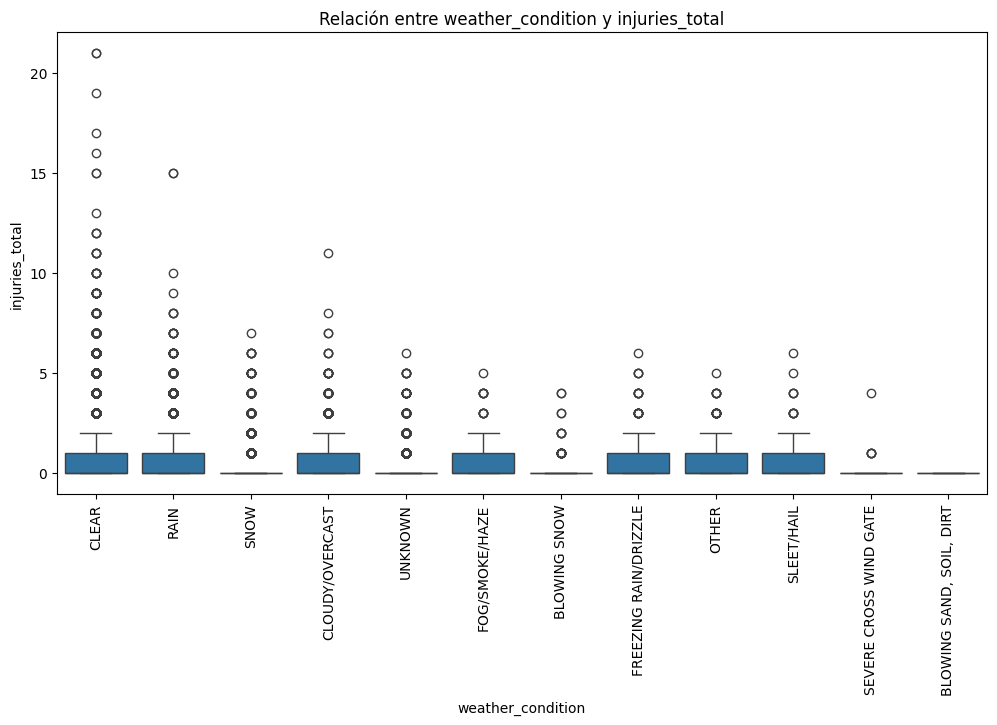

In [27]:
# 11. Análisis de la relación entre variables categóricas y numéricas
# Por ejemplo, relación entre 'weather_condition' y 'injuries_total'
if 'weather_condition' in df.columns and 'injuries_total' in df.columns:
    print("\nRelación entre 'weather_condition' y 'injuries_total':")
    plt.figure(figsize=(12, 6))
    sns.boxplot(data=df, x='weather_condition', y='injuries_total')
    plt.xticks(rotation=90)
    plt.title('Relación entre weather_condition y injuries_total')
    plt.show()